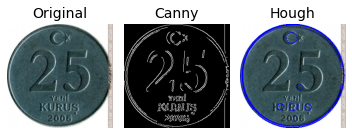

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import cv2
import warnings
warnings.filterwarnings("ignore")

""" PART-1 """

images_path = glob.glob('part 1 dataset\*')
edge_images, part1_images = [], []

# read images and apply canny edge detection
for i in images_path:
    img = cv2.imread(i)
    img = cv2.resize(img, (int(img.shape[0] / 2), int(img.shape[1] / 2)), interpolation=cv2.INTER_LINEAR)
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_blur = cv2.GaussianBlur(img_gray, (3, 3), 0)
    edges = cv2.Canny(image=img_blur, threshold1=150, threshold2=200)
    part1_images.append(img)
    edge_images.append(edges)

part1_images = np.array(part1_images)
canny_images = np.array(edge_images)


# Circle detection function which is using Hough Circle Transform algorithm
def CircleDetection(image, r_min, r_max, min_votes=150):
    accumulator = np.zeros((image.shape[1] + 1, image.shape[0] + 1, r_max - r_min + 1))
    y_index, x_index = np.nonzero(image)
    theta = np.deg2rad(np.arange(0, 360, 1))
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    for radius in range(r_min, r_max + 1):
        for pixel in range(len(x_index)):
            x = x_index[pixel]
            y = y_index[pixel]
            for angle in range(len(theta)):
                a = round(x - radius * cos_theta[angle])
                b = round(y - radius * sin_theta[angle])
                if 0 <= a < image.shape[1] and 0 <= b < image.shape[0]:
                    accumulator[int(a), int(b), (radius - r_min)] += 1

    circles = []
    # if the vote number of value in accumulator > min number of votes (threshold)
    acc_max = accumulator > min_votes
    a_index_max, b_index_max, r_index_max = np.nonzero(acc_max)
    print()
    for i in range(len(a_index_max)):
        b = b_index_max[i]
        a = a_index_max[i]
        radius = r_index_max[i] + r_min
        circles.append((a, b, radius))

    circles.sort(key=lambda x: x[2])
    circles.reverse()
    if len(circles) >= 20:
        circles = circles[:20]
    return circles

# for i in range(len(part1_images)):
for i in range(2,3):
    input_img = part1_images[i]
    canny_img = canny_images[i]
    output_img = input_img.copy()

    # Run Hough Circle Transform Method
    r_Min = 5
    r_Max = int(input_img.shape[0] / 2)
    all_circles = CircleDetection(canny_img, r_Min, r_Max)
    if all_circles is not None:
        for x, y, r in all_circles:
            cv2.circle(output_img, (x, y), r, (0, 0, 255), 1)

    # Save output image
    cv2.imwrite('houghcircle' + str(i) + '.jpg', output_img)

    # Show Original, Canny and Hough Transform images
    fig, axes = plt.subplots(ncols=3, figsize=(5, 5))
    axes[0].set_title('Original', fontsize=14)
    axes[1].set_title('Canny', fontsize=14)
    axes[2].set_title('Hough', fontsize=14)

    axes[0].imshow(input_img)
    axes[1].imshow(canny_img, cmap='gray')
    axes[2].imshow(output_img)

    for ax in axes:
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [ ]:
#21.54